In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
def read_data(file_path):
    '''Read Excel File'''
    
    df = pd.read_excel(file_path, engine = 'openpyxl')

    return df

In [64]:
def prep_time_per_task(df):
    '''Extract time relevant data for each student per question and create new df'''
    
    task_time_df = (
    df.groupby(['candidate_id', 'question_number'], as_index=False)
      .first() 
      [['candidate_id', 'question_number', 'question_title', 'question_duration_seconds', 
        'incident_time_mins', 'auto_score_per_question', 'max_question_score']]
      .copy()
    )
		
    return task_time_df

In [65]:
def convert_seconds_to_minutes(df):
    df['actual_time_per_questions_mins'] = round(df['question_duration_seconds']/60, 2)
    return df

In [66]:
def calculate_ideal_time_per_task(df):
    df['expected_time_spent (mins)'] = round(210 * task_time_df['max_question_score'] / 100, 2)
    return df

In [67]:
def run_analysis(file_path):

    # Read Data
    df = read_data(file_path)

    # prep and extract data from original df for time per task analysis
    task_time_df = prep_time_per_task(df)

    # convert time taken per task from second to minutes
    task_time_df = convert_seconds_to_minutes(task_time_df)

    # calculate ideal time 
    task_time_df = calculate_ideal_time_per_task(task_time_df)

    return task_time_df


In [68]:
def export_data(df, output_path, file_format='xlsx'):
    """
    Save cleaned data to file 
    Args:
        df (pandas.DataFrame): Cleaned DataFrame
        output_path (str): Path to save the file
        file_format (str): Format to save ('xlsx', 'csv', 'json')
    """
    try:
        if file_format == 'xlsx':
            df.to_excel(output_path, index=False)
        elif file_format == 'csv':
            df.to_csv(output_path, index=False)
        elif file_format == 'json':
            df.to_json(output_path, orient='records', indent=2)
        else:
            raise ValueError(f"Unsupported format: {file_format}")
        
        print(f"Data saved successfully to {output_path}")
    except Exception as e:
        print(f"Error saving data: {e}")

### Execution

In [69]:
df = read_data("data/cleaned_data.xlsx")
df.head()

,last_modified_time,exam_start_time,extra_time_mins,incident_time_mins,candidate_id,max_question_score,question_number,question_title,question_duration_seconds,auto_score_per_question,candidate_response_code,candidate_response_text,total_score
0,2024-12-11 15:57:52,2024-12-11 14:00:02,0,0,17107,2.4,1.1,Tallsystemer,85,2.4,simpleChoice_1368096164456,Heksadesimale tall,71.61
1,2024-12-11 15:57:52,2024-12-11 14:00:02,0,0,17107,2.4,1.1,Tallsystemer,85,2.4,simpleChoice_IA172399520449584402464-f255-46e6...,Oktale tall,71.61
2,2024-12-11 15:57:52,2024-12-11 14:00:02,0,0,17107,2.4,1.1,Tallsystemer,85,2.4,simpleChoice_IA17239952044953d28e157-ac4c-49db...,Titallsystemet,71.61
3,2024-12-11 15:57:52,2024-12-11 14:00:02,0,0,17107,2.4,1.1,Tallsystemer,85,2.4,simpleChoice_IA1723995204495960f601e-73d5-48f8...,Heksadesimale tall,71.61
4,2024-12-11 15:57:52,2024-12-11 14:00:02,0,0,17107,2.4,1.1,Tallsystemer,85,2.4,simpleChoice_IA17239952636882cb13f25-bd73-4352...,Titallsystemet,71.61


In [70]:
task_time_df = prep_time_per_task(df)
task_time_df.head()

,candidate_id,question_number,question_title,question_duration_seconds,incident_time_mins,auto_score_per_question,max_question_score
0,17104,1.1,Tallsystemer,295,0,2.4,2.4
1,17104,1.2,Tallsortering,209,0,3.0,3.0
2,17104,1.3,ASCII - Hullbånd,496,0,0.0,3.8
3,17104,1.4,Minnebruk,210,0,3.0,3.0
4,17104,1.5,LMC - Aritmetikk,373,0,3.0,3.0


In [71]:
# add column for minutes per question
task_time_df = convert_seconds_to_minutes(task_time_df)
task_time_df.head()

,candidate_id,question_number,question_title,question_duration_seconds,incident_time_mins,auto_score_per_question,max_question_score,actual_time_per_questions_mins
0,17104,1.1,Tallsystemer,295,0,2.4,2.4,4.92
1,17104,1.2,Tallsortering,209,0,3.0,3.0,3.48
2,17104,1.3,ASCII - Hullbånd,496,0,0.0,3.8,8.27
3,17104,1.4,Minnebruk,210,0,3.0,3.0,3.50
4,17104,1.5,LMC - Aritmetikk,373,0,3.0,3.0,6.22


In [72]:
task_time_df = calculate_ideal_time_per_task(task_time_df)
task_time_df

,candidate_id,question_number,question_title,question_duration_seconds,incident_time_mins,auto_score_per_question,max_question_score,actual_time_per_questions_mins,expected_time_spent (mins)
0,17104,1.1,Tallsystemer,295,0,2.4,2.4,4.92,5.04
1,17104,1.2,Tallsortering,209,0,3.0,3.0,3.48,6.30
2,17104,1.3,ASCII - Hullbånd,496,0,0.0,3.8,8.27,7.98
3,17104,1.4,Minnebruk,210,0,3.0,3.0,3.50,6.30
4,17104,1.5,LMC - Aritmetikk,373,0,3.0,3.0,6.22,6.30
...,...,...,...,...,...,...,...,...,...
15475,17844,4.4,CIDR til punktnotasjon,1136,8,0.0,4.0,18.93,8.40
15476,17844,4.5,Subnet + Broadcast,2267,8,0.0,6.0,37.78,12.60
15477,17844,4.6,Transportlagsprotokoller,502,8,0.5,2.0,8.37,4.20
15478,17844,4.7,HTTP,149,8,0.0,1.0,2.48,2.10


In [73]:
question_summary = (
    task_time_df.groupby('question_number')
    .agg({
        'actual_time_per_questions_mins': 'mean',
        'auto_score_per_question': 'mean',
        'max_question_score': 'all'
    })
    .reset_index()
)

# Ideal time comparison
question_summary['over_ideal_time'] = question_summary['actual_time_per_questions_mins'] - 1.8
question_summary['pct_of_ideal_time'] = question_summary['actual_time_per_questions_mins'] / 1.8 * 100

# Score as percentage
question_summary['pct_score'] = question_summary['auto_score_per_question'] / question_summary['max_question_score'] * 100


In [74]:
correlation = task_time_df[['actual_time_per_questions_mins', 'auto_score_per_question']].corr().iloc[0,1]
print(f"Correlation between time spent and score (all rows): {correlation:.2f}")

Correlation between time spent and score (all rows): 0.12


### Execute Analysis

In [93]:
task_time_df = run_analysis("data/cleaned_data.xlsx")

In [76]:
export_data(task_time_df, 'processed data/Time_Per_Question_Analysis_2024.xlsx', 'xlsx')

Data saved successfully to processed data/Time_Per_Question_Analysis_2024.xlsx


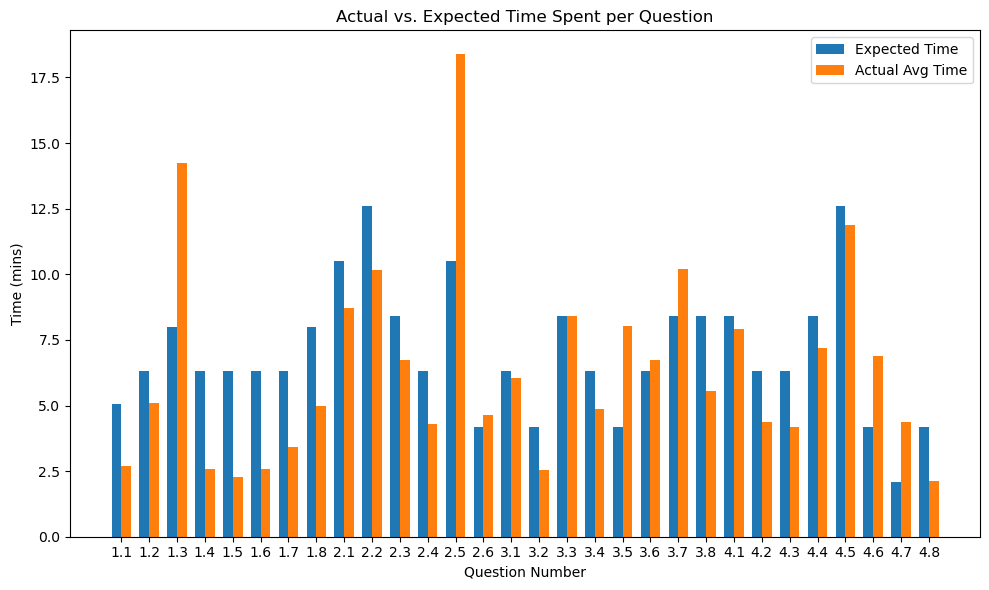

In [90]:
grouped = task_time_df.groupby('question_number').agg({
    'expected_time_spent (mins)': 'first',
    'actual_time_per_questions_mins': 'mean',
    'auto_score_per_question' : 'all'
}).reset_index()

# 2. Plot as side-by-side bars
x = np.arange(len(grouped))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, grouped['expected_time_spent (mins)'], width, label='Expected Time')
plt.bar(x + width/2, grouped['actual_time_per_questions_mins'], width, label='Actual Avg Time')
plt.xlabel('Question Number')
plt.ylabel('Time (mins)')
plt.title('Actual vs. Expected Time Spent per Question')
plt.xticks(x, grouped['question_number'])
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
grouped_melted = pd.melt(
    grouped,
    id_vars='question_number',
    value_vars=['expected_time_spent (mins)', 'actual_time_per_questions_mins'],
    var_name='Time Type',
    value_name='Minutes'
)

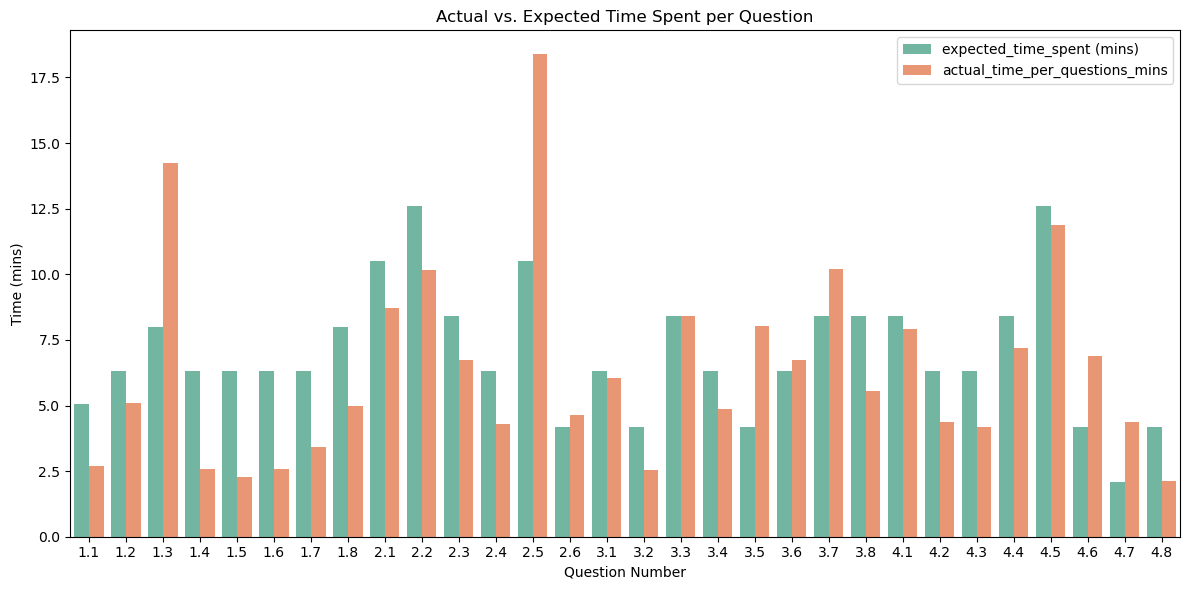

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=grouped_melted,
    x='question_number',
    y='Minutes',
    hue='Time Type',
    palette='Set2'
)
plt.xlabel('Question Number')
plt.ylabel('Time (mins)')
plt.title('Actual avg time vs. Expected Time Spent per Question')
plt.legend(title='')
plt.tight_layout()
plt.show()


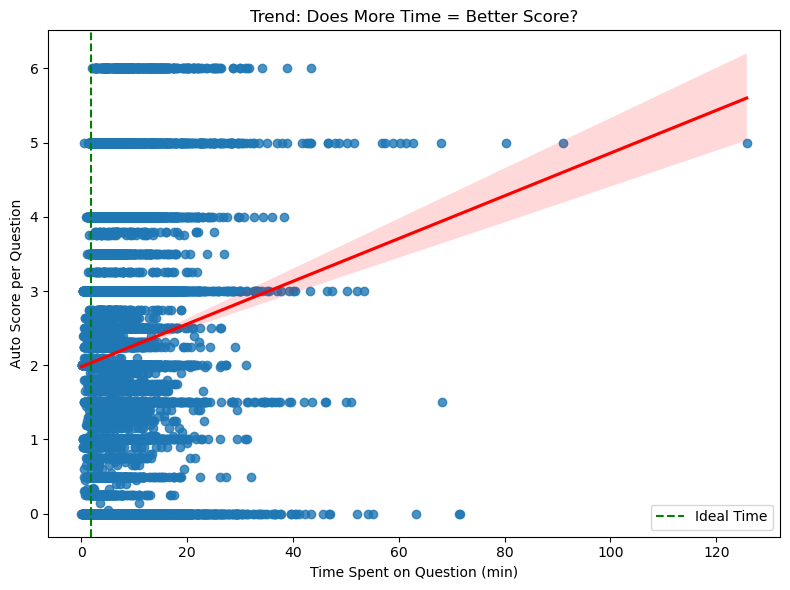

In [81]:
plt.figure(figsize=(8,6))
sns.regplot(
    x='actual_time_per_questions_mins',
    y='auto_score_per_question',
    data=task_time_df,
    scatter=True,
    line_kws={'color': 'red'}
)
plt.axvline(1.8, color='green', linestyle='--', label='Ideal Time')
plt.xlabel('Time Spent on Question (min)')
plt.ylabel('Auto Score per Question')
plt.title('Trend: Does More Time = Better Score?')
plt.legend()
plt.tight_layout()
plt.show()